## Importación de librerías

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Carga de datos

Se cargan 100,000 datos dados los recursos del sistema para procesar el dataset completo

In [3]:
train = pd.read_csv('train_data.csv', nrows=100000)

In [4]:
labels = pd.read_csv('train_labels.csv')

## Preprocesado de datos

Cargamos el csv de train y se decide escoger la celda del cliente como índice; y luego de esto se elimina la celda que queda duplicada

In [5]:
train.index = train.customer_ID
del(train['customer_ID'])
train.head()

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,NaN,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,NaN,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,NaN,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


## Vamos a simular un 10% de datos categóricos

## Valores faltantes (NaN)

Se muestran las columnas con datos faltantes mayores a 5000 instancias

In [6]:
k = train.isna().sum()
k[(k!=0)&(k>5000)]

S_3      18626
D_42     85386
D_43     30195
D_44      5053
D_46     21842
D_48     12915
D_49     89762
D_50     56328
P_3       5411
D_53     73244
S_7      18626
D_56     54123
S_9      52734
D_61     10649
D_62     13765
B_17     56191
D_66     88923
D_73     98851
D_76     88724
D_77     45668
D_78      5053
R_9      94207
D_82     72874
B_29     92928
D_87     99927
D_88     99850
D_105    54142
D_106    89870
R_26     89125
D_108    99470
D_110    99366
D_111    99366
B_39     99327
S_27     25379
B_42     98645
D_132    89817
D_134    96384
D_135    96384
D_136    96384
D_137    96384
D_138    96384
D_142    82728
dtype: int64

Estos son los nombres de las columnas que vamos a simular como categóricas las cuales fueron escogidas de la lista anterior de forma aleatoria dado que al tener una gran cantidad de datos faltantes, no afectará en nuestro resultado el cambiar estos datos y mejor simular estas columnas como variables categóricas; este procedimiento se realizó dados los requerimientos del dataset impuestos por el profesor

In [7]:
columnas = ['D_88','D_87','B_29','R_9','D_73','D_49','D_66','D_76','D_42','D_82']

## Función para el cambio de variables a categóricas 

In [8]:
def categorical_simulation(df,col,n):
#Borramos la columna
    del(df[col])
#Creamos una nueva con el mismo nombre y asignamos los valores de forma aleatoria
    valores = np.array([np.random.randint(1,n) for i in range (df.shape[0])])
    df[col] = valores

## Aplicamos la función a las columnas que se escogieron anteriormente

In [9]:
for i in range(len(columnas)):
    categorical_simulation(train,columnas[i],np.random.randint(3,7))

C:\Users\SANTIAGO GARCIA\AppData\Local\Temp\ipykernel_49948\3452197582.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = valores
C:\Users\SANTIAGO GARCIA\AppData\Local\Temp\ipykernel_49948\3452197582.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = valores
C:\Users\SANTIAGO GARCIA\AppData\Local\Temp\ipykernel_49948\3452197582.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns

## Observamos como queda el dataset modificado con las nuevas variables categóricas

In [10]:
train.head()

,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,...,D_88,D_87,B_29,R_9,D_73,D_49,D_66,D_76,D_42,D_82
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,NaN,...,3,1,4,3,1,2,3,1,1,1
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,NaN,...,2,2,2,1,5,1,3,1,1,2
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,NaN,...,2,2,2,2,5,2,3,1,1,3
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,NaN,...,1,2,4,4,2,2,3,2,2,2
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,NaN,...,1,1,1,1,4,1,1,1,2,2


## Observamos los diferentes tipos de datos

A continuación se muestran los diferentes tipos de variables: tanto categóricas como continuas

In [11]:
for c in train.columns:
    print ("%20s"%c, train[c].dtype)

                 S_2 object
                 P_2 float64
                D_39 float64
                 B_1 float64
                 B_2 float64
                 R_1 float64
                 S_3 float64
                D_41 float64
                 B_3 float64
                D_43 float64
                D_44 float64
                 B_4 float64
                D_45 float64
                 B_5 float64
                 R_2 float64
                D_46 float64
                D_47 float64
                D_48 float64
                 B_6 float64
                 B_7 float64
                 B_8 float64
                D_50 float64
                D_51 float64
                 B_9 float64
                 R_3 float64
                D_52 float64
                 P_3 float64
                B_10 float64
                D_53 float64
                 S_5 float64
                B_11 float64
                 S_6 float64
                D_54 float64
                 R_4 float64
               

## Agrupamos los datos de train por cliente con su respectiva media para facilitar el manejo de los datos

Se borra la celda que contiene fechas porque no podemos utilizar esta celda para calcular una media; además no se escoge esta celda de fechas como índice dado que son fechas diferentes sin un orden lógico en el cual no podemos realizar un uso adecuadode las series temporales

In [12]:
del(train['S_2'])
train.groupby('customer_ID').mean()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_88,D_87,B_29,R_9,D_73,D_49,D_66,D_76,D_42,D_82
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.933824,0.010704,0.012007,1.005086,0.004509,0.113215,0.005021,0.006456,NaN,0.004673,...,1.923077,1.538462,2.769231,3.000000,3.307692,1.538462,2.230769,2.615385,1.615385,2.307692
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.899820,0.215205,0.025654,0.991083,0.006246,0.120578,0.004993,0.005663,0.144571,0.004311,...,2.153846,1.153846,3.230769,3.153846,2.692308,1.384615,2.000000,2.230769,1.538462,2.538462
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.878454,0.004181,0.004386,0.815677,0.006621,NaN,0.006842,0.005493,NaN,0.013902,...,1.846154,1.461538,2.769231,3.384615,2.846154,1.307692,1.769231,2.384615,1.384615,2.307692
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.598969,0.048862,0.059876,0.955264,0.005665,0.247750,0.005490,0.006423,0.061026,0.005246,...,1.769231,1.461538,2.692308,3.076923,2.615385,1.307692,2.461538,2.538462,1.692308,2.076923
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.891679,0.004644,0.005941,0.814543,0.004180,0.173102,0.005352,0.005088,0.048778,0.003551,...,2.000000,1.769231,3.153846,2.538462,3.230769,1.307692,1.846154,2.846154,1.538462,2.461538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a15c8d9f2524d6895648,0.487335,0.131842,0.696957,0.024518,0.081443,0.215530,0.004771,0.943216,0.200166,0.591641,...,1.923077,1.538462,2.846154,2.461538,3.538462,1.538462,2.000000,2.846154,1.538462,2.384615
049dc60e06ade9b0bf946472126eed3bb531227f60c7c4f9e58336a0e162d465,0.932400,0.097467,0.017680,0.990289,0.003905,0.114927,0.026687,0.005355,0.152240,0.005866,...,2.076923,1.538462,2.461538,2.769231,3.000000,1.384615,2.153846,2.846154,1.538462,2.923077
049dcc14cb874dbcd3b473f17e7eb375e6f13ef591bf0f895cd8fe052d873c99,0.831539,0.058936,0.012922,0.874011,0.003873,0.152555,0.005184,0.011129,NaN,0.005686,...,1.923077,1.461538,3.000000,3.307692,3.076923,1.692308,1.846154,1.846154,1.692308,2.615385


## Concatenamos los DataFrames porque la variable objetivo se encuentra en un dataset diferente al cual estamos trabajando

In [13]:
labels.index = labels.customer_ID
del(labels['customer_ID'])
labels.head()

,target
customer_ID,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0


In [15]:
data = pd.concat([train.groupby('customer_ID').mean(),labels.drop(labels.index[len(train.groupby('customer_ID').mean().index):-1])], axis = 1)
data = data.drop(data.index[-1])

## Ahora se muestran los datos un poco más organizados

In [16]:
data

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_43,D_44,...,D_87,B_29,R_9,D_73,D_49,D_66,D_76,D_42,D_82,target
customer_ID,,,,,,,,,,,,,,,,,,,,,
0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a,0.933824,0.010704,0.012007,1.005086,0.004509,0.113215,0.005021,0.006456,NaN,0.004673,...,1.538462,2.769231,3.000000,3.307692,1.538462,2.230769,2.615385,1.615385,2.307692,0
00000fd6641609c6ece5454664794f0340ad84dddce9a267a310b5ae68e9d8e5,0.899820,0.215205,0.025654,0.991083,0.006246,0.120578,0.004993,0.005663,0.144571,0.004311,...,1.153846,3.230769,3.153846,2.692308,1.384615,2.000000,2.230769,1.538462,2.538462,0
00001b22f846c82c51f6e3958ccd81970162bae8b007e80662ef27519fcc18c1,0.878454,0.004181,0.004386,0.815677,0.006621,NaN,0.006842,0.005493,NaN,0.013902,...,1.461538,2.769231,3.384615,2.846154,1.307692,1.769231,2.384615,1.384615,2.307692,0
000041bdba6ecadd89a52d11886e8eaaec9325906c9723355abb5ca523658edc,0.598969,0.048862,0.059876,0.955264,0.005665,0.247750,0.005490,0.006423,0.061026,0.005246,...,1.461538,2.692308,3.076923,2.615385,1.307692,2.461538,2.538462,1.692308,2.076923,0
00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8ad51ca8b8c4a24cefed,0.891679,0.004644,0.005941,0.814543,0.004180,0.173102,0.005352,0.005088,0.048778,0.003551,...,1.769231,3.153846,2.538462,3.230769,1.307692,1.846154,2.846154,1.538462,2.461538,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
049d799511c2d516bf98c1f5f0a1a42b6487f3774a54a15c8d9f2524d6895648,0.487335,0.131842,0.696957,0.024518,0.081443,0.215530,0.004771,0.943216,0.200166,0.591641,...,1.538462,2.846154,2.461538,3.538462,1.538462,2.000000,2.846154,1.538462,2.384615,1
049dc60e06ade9b0bf946472126eed3bb531227f60c7c4f9e58336a0e162d465,0.932400,0.097467,0.017680,0.990289,0.003905,0.114927,0.026687,0.005355,0.152240,0.005866,...,1.538462,2.461538,2.769231,3.000000,1.384615,2.153846,2.846154,1.538462,2.923077,0
049dcc14cb874dbcd3b473f17e7eb375e6f13ef591bf0f895cd8fe052d873c99,0.831539,0.058936,0.012922,0.874011,0.003873,0.152555,0.005184,0.011129,NaN,0.005686,...,1.461538,3.000000,3.307692,3.076923,1.692308,1.846154,1.846154,1.692308,2.615385,0


## Inspeccionamos variables numéricas

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
P_2,8248.0,0.645217,0.238169,-0.208841,0.461826,0.676924,0.854063,1.008938
D_39,8294.0,0.153711,0.166852,0.000428,0.021303,0.112053,0.230677,2.677759
B_1,8294.0,0.129424,0.203707,-0.020321,0.016494,0.039711,0.142354,1.324053
B_2,8293.0,0.614871,0.350243,0.001010,0.260582,0.813680,0.902776,1.008287
R_1,8294.0,0.082176,0.160991,0.000083,0.004828,0.005874,0.081934,1.758894
...,...,...,...,...,...,...,...,...
D_66,8294.0,2.000645,0.260305,1.000000,1.846154,2.000000,2.153846,3.000000
D_76,8294.0,2.501244,0.358370,1.000000,2.307692,2.500000,2.692308,4.000000
D_42,8294.0,1.500264,0.158617,1.000000,1.384615,1.500000,1.615385,2.000000
D_82,8294.0,2.505329,0.358969,1.000000,2.307692,2.538462,2.692308,4.000000


## Matriz de correlación

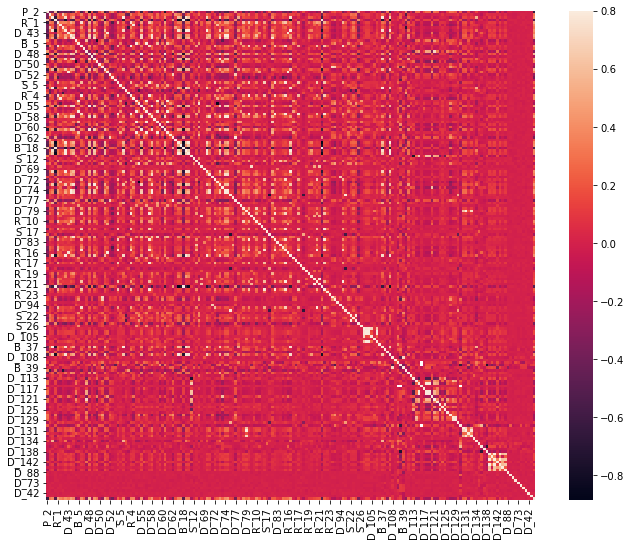

In [19]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

## Limpieza de datos

## Visualización de datos